<div style="text-align:center"><span style="font-size:28px">DS583 EDA</span></div>

---

In [2]:
# Libraries
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [3]:
# Reads in red wine data
red = pd.read_csv("../data/winequality-red.csv", sep=';')
red.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

In [4]:
# Reads in white wine data
white = pd.read_csv("../data/winequality-white.csv", sep=';')
white.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   
5            8.1              0.28         0.40             6.9      0.050   
6            6.2              0.32         0.16             7.0      0.045   
7            7.0              0.27         0.36            20.7      0.045   
8            6.3              0.30         0.34             1.6      0.049   
9            8.1              0.22         0.43             1.5      0.044   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   
5                 30.0                  97.0   0.9951  3.26       0.44   
6                 30.0                 136.0   0.9949  3.18       0.47   
7                 45.0                 170.0   1.0010  3.00       0.45   
8                 14.0                 132.0   0.9940  3.30       0.49   
9                 28.0                 129.0   0.9938  3.22       0.45   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6  
5     10.1        6  
6      9.6        6  
7      8.8        6  
8      9.5        6  
9     11.0        6

In [5]:
# Shape of red wine dataframe
red.shape

(1599, 12)

In [6]:
# Shape of red wine dataframe
white.shape

(4898, 12)

In [7]:
# Red wine summary statistics
red.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [8]:
# White wine summary statistics
white.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

In [9]:
# Missing values in red wine dataframe
missing = red.isnull().sum()
missing

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
# Missing values in white wine dataframe
missing = white.isnull().sum()
missing

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
print(f"The red wine dataset contains {red.duplicated().sum()} duplicate rows")

The red wine dataset contains 240 duplicate rows


In [12]:
print(f"The white wine dataset contains {white.duplicated().sum()} duplicate rows")

The white wine dataset contains 937 duplicate rows


<div style="text-align:center">
<b>Duplicated rows assumed to be independent sample collection points and will, therefore, be left in analysis</b>
</div>

In [13]:
# Checking red wine details
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [14]:
# Checking white wine details
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
X = white.drop(labels=['quality'], axis=1)

# Adds a constant to the independent variables
X_with_const = add_constant(X)

# Calculates VIF for white wine data
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) 
                   for i in range(X_with_const.shape[1])]
vif_data

Variable           VIF
0                  const  3.067856e+06
1          fixed acidity  2.691435e+00
2       volatile acidity  1.141156e+00
3            citric acid  1.165215e+00
4         residual sugar  1.264406e+01
5              chlorides  1.236822e+00
6    free sulfur dioxide  1.787880e+00
7   total sulfur dioxide  2.239233e+00
8                density  2.823255e+01
9                     pH  2.196362e+00
10             sulphates  1.138540e+00
11               alcohol  7.706957e+00

In [17]:
X = red.drop(labels=['quality'], axis=1)

# Adds a constant to the independent variables
X_with_const = add_constant(X)

# Calculates VIF for red wine data
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) 
                   for i in range(X_with_const.shape[1])]
vif_data

Variable           VIF
0                  const  1.710538e+06
1          fixed acidity  7.767512e+00
2       volatile acidity  1.789390e+00
3            citric acid  3.128022e+00
4         residual sugar  1.702588e+00
5              chlorides  1.481932e+00
6    free sulfur dioxide  1.963019e+00
7   total sulfur dioxide  2.186813e+00
8                density  6.343760e+00
9                     pH  3.329732e+00
10             sulphates  1.429434e+00
11               alcohol  3.031160e+00

In [ ]:
# histograms per wine type
features = white.columns

white_histograms = []
for feature in features:
    chart = alt.Chart(white).mark_bar(color='#8B6A4F', stroke='#7A5C40', strokeWidth=1).encode(  
        alt.X(f'{feature}:Q', bin=True),
        alt.Y('count():Q', title=None)
    ).properties(
        width=100,
        height=100
    )
    white_histograms.append(chart)

red_histograms = []
for feature in features:
    chart = alt.Chart(red).mark_bar(color='#8B0000').encode( 
        alt.X(f'{feature}:Q', bin=True),
        alt.Y('count():Q', title=None)
    ).properties(
        width=100,
        height=100
    )
    red_histograms.append(chart)

row1_white = alt.hconcat(*white_histograms[:6]) 
row2_white = alt.hconcat(*white_histograms[6:])  
row1_red = alt.hconcat(*red_histograms[:6])
row2_red = alt.hconcat(*red_histograms[6:])

feature_grid = alt.vconcat(row1_white, row2_white, row1_red, row2_red).resolve_scale(
    y='independent'
)
feature_grid

alt.VConcatChart(...)

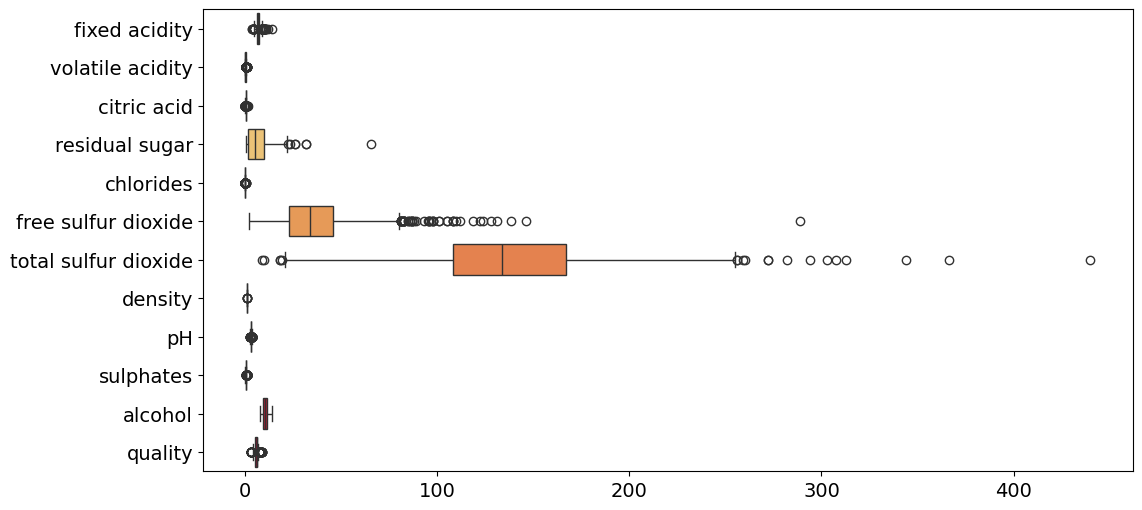

In [44]:
# boxplot for white wine
plt.figure(figsize=(12, 6))
sns.boxplot(data=white, orient="h", palette="YlOrRd")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

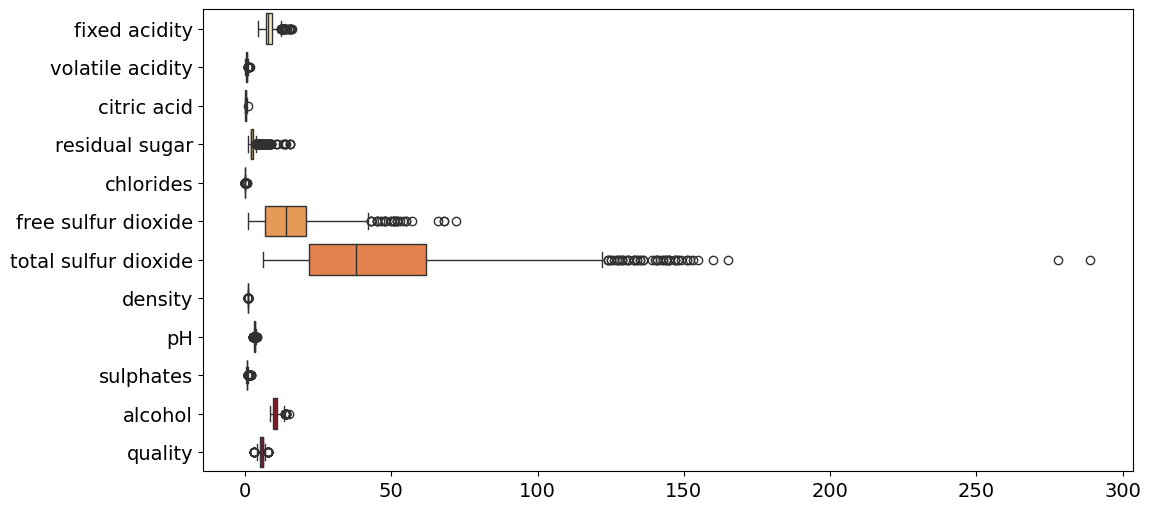

In [43]:
# boxplot for red wine
plt.figure(figsize=(12, 6))
sns.boxplot(data=red, orient="h", palette="YlOrRd")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

/var/folders/ww/9w_1k26n46j5y4kkl168yqtm0000gn/T/ipykernel_3915/3416196422.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.9])


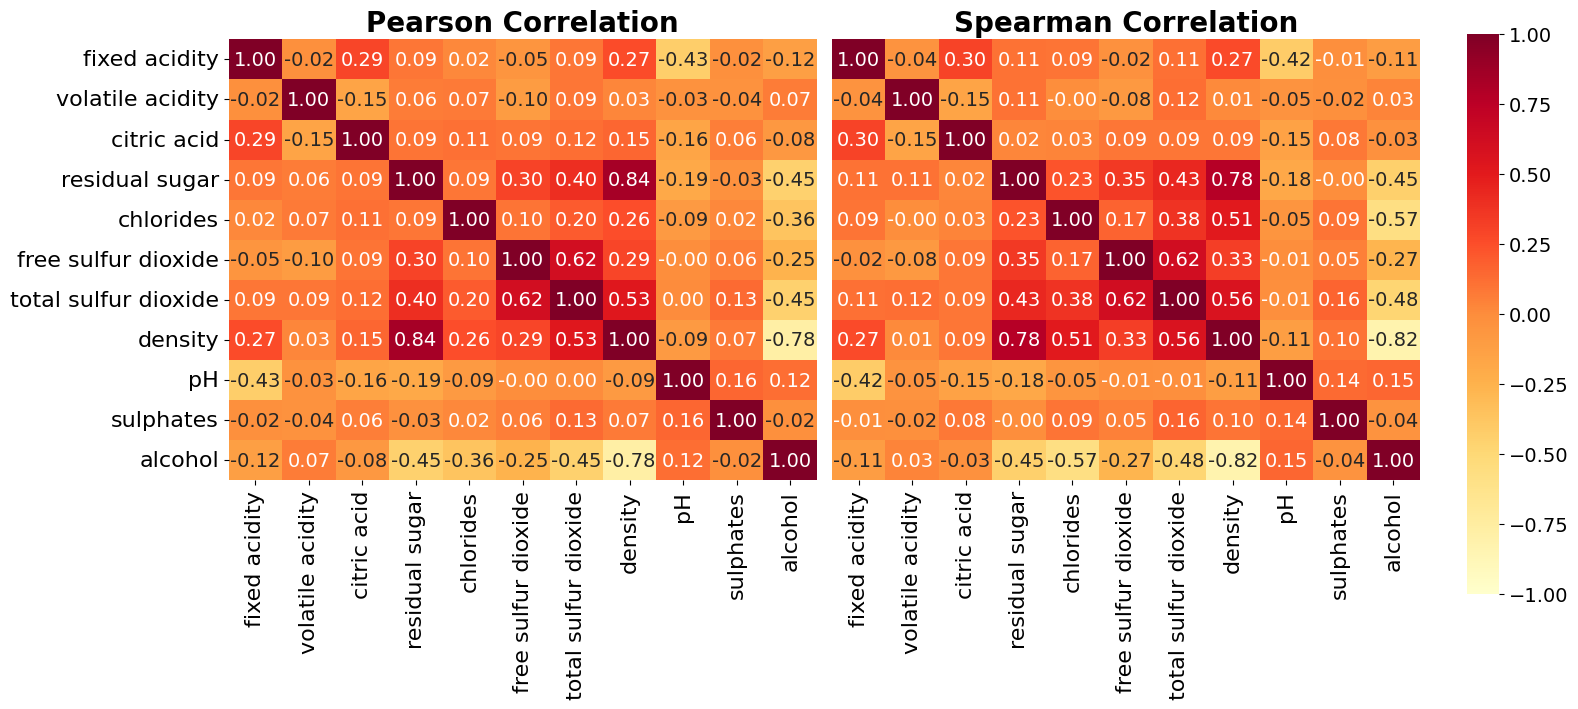

In [39]:
# Correlation matrix of white wine data
white_cm = white.drop(columns='quality').corr()
white_spear = white.drop(columns='quality').corr(method='spearman')

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar_ax.tick_params(labelsize=14)

# Pearson correlation
sns.heatmap(white_cm, annot=True, cmap='YlOrRd', fmt='.2f', ax=axes[0], cbar=True, cbar_ax=cbar_ax, vmin=-1, vmax=1, annot_kws={'fontsize': 14})
axes[0].set_title("Pearson Correlation", fontsize=20, fontweight='bold')
axes[0].tick_params(axis='both', labelsize=16)

# Spearman correlation
sns.heatmap(white_spear, annot=True, cmap='YlOrRd', fmt='.2f', ax=axes[1], cbar=True, cbar_ax=cbar_ax, vmin=-1, vmax=1, annot_kws={'fontsize': 14}, yticklabels=False)
axes[1].set_title("Spearman Correlation", fontsize=20, fontweight='bold')
axes[1].tick_params(axis='both', labelsize=16)

plt.tight_layout(rect=[0, 0, 0.9, 0.9]) 
plt.show()


/var/folders/ww/9w_1k26n46j5y4kkl168yqtm0000gn/T/ipykernel_3915/4267082019.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.9])


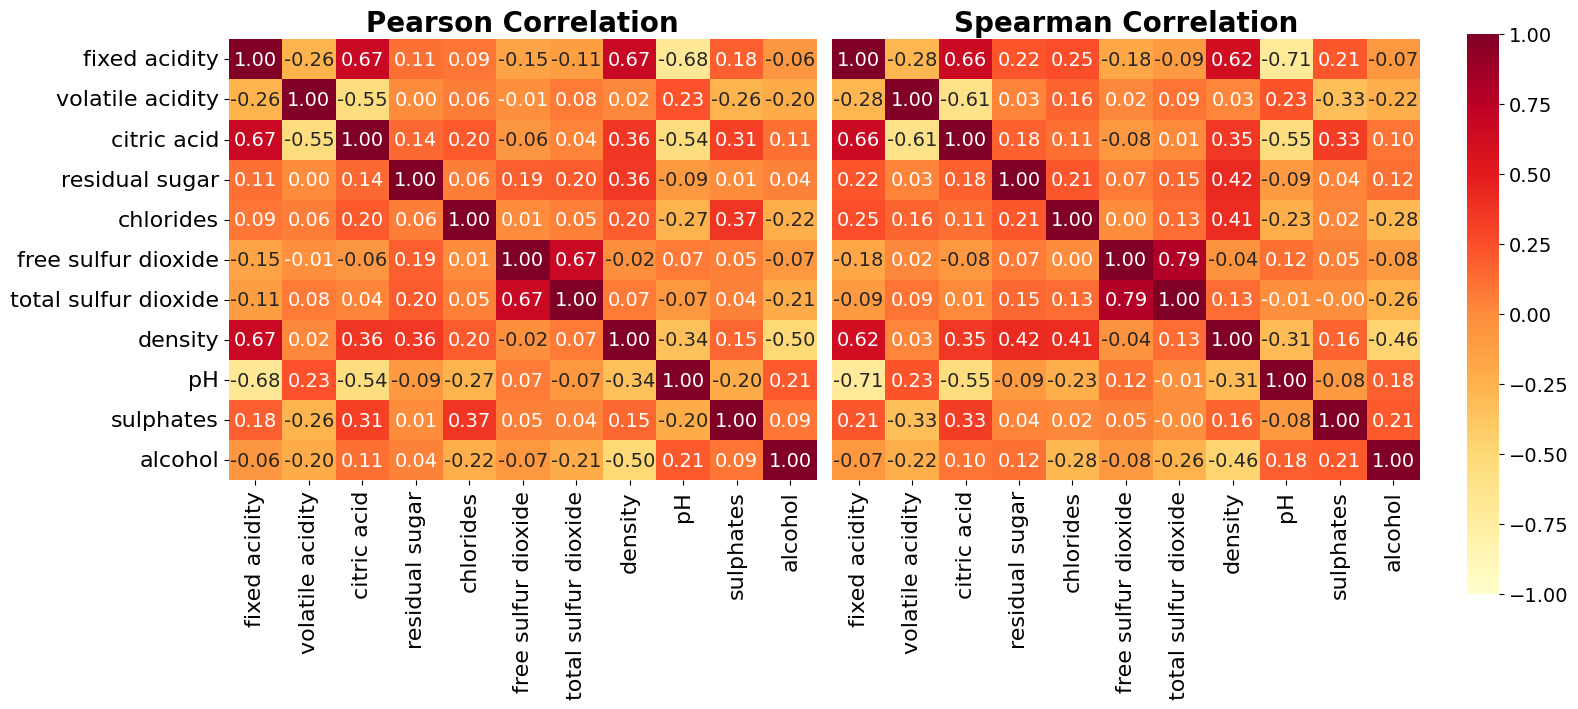

In [40]:
# Correlation matrix of red wine data
red_cm = red.drop(columns='quality').corr()
red_spear = red.drop(columns='quality').corr(method='spearman')

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar_ax.tick_params(labelsize=14)

# Pearson correlation
sns.heatmap(red_cm, annot=True, cmap='YlOrRd', fmt='.2f', ax=axes[0], cbar=True, cbar_ax=cbar_ax, vmin=-1, vmax=1, annot_kws={'fontsize': 14})
axes[0].set_title("Pearson Correlation", fontsize=20, fontweight='bold')
axes[0].tick_params(axis='both', labelsize=16)

# Spearman correlation
sns.heatmap(red_spear, annot=True, cmap='YlOrRd', fmt='.2f', ax=axes[1], cbar=True, cbar_ax=cbar_ax, vmin=-1, vmax=1, annot_kws={'fontsize': 14}, yticklabels=False)
axes[1].set_title("Spearman Correlation", fontsize=20, fontweight='bold')
axes[1].tick_params(axis='both', labelsize=16)

plt.tight_layout(rect=[0, 0, 0.9, 0.9]) 
plt.show()

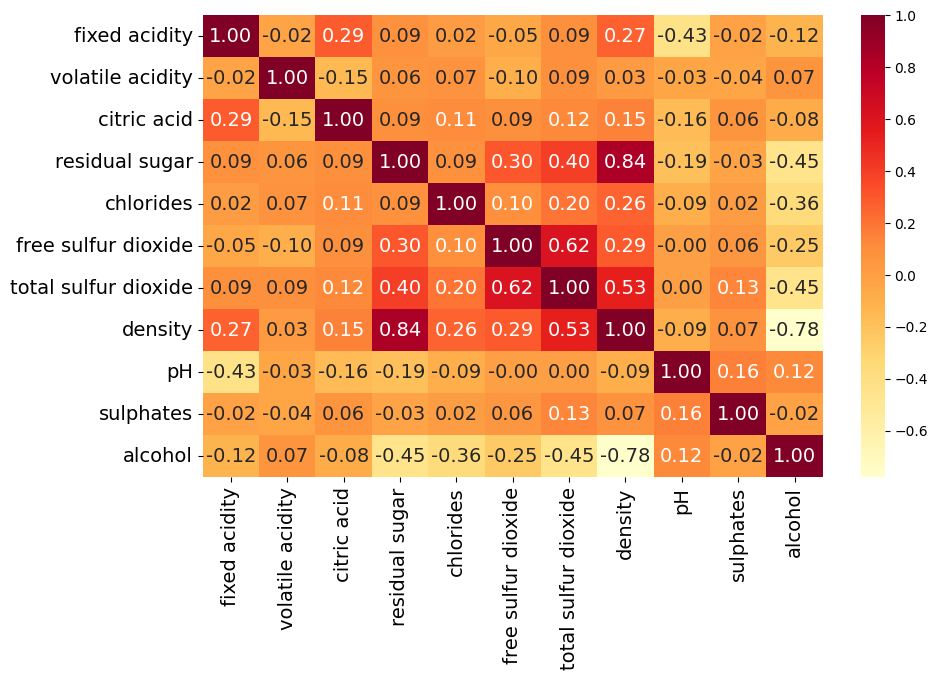

In [37]:
# Correlation matrix of white wine data
white_cm = white.drop(columns='quality').corr()

plt.figure(figsize=(10, 6))
sns.heatmap(white_cm, annot=True, cmap='YlOrRd', fmt='.2f', annot_kws={'fontsize': 14})
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

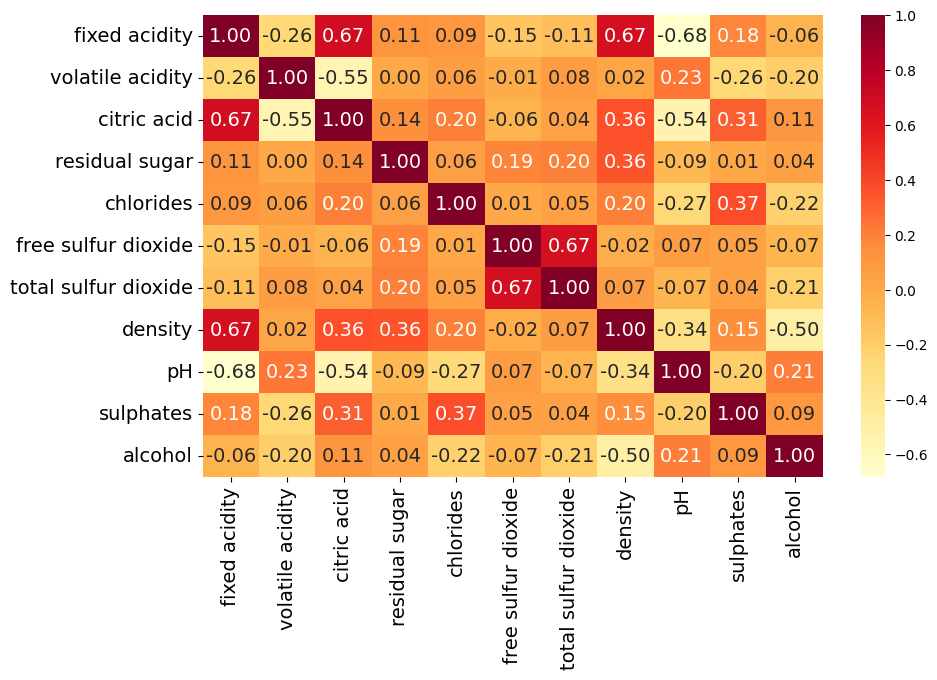

In [25]:
# Correlation matrix of red wine data
red_cm = red.drop(columns='quality').corr()

plt.figure(figsize=(10, 6))
sns.heatmap(red_cm, annot=True, cmap='YlOrRd', fmt='.2f', annot_kws={'fontsize': 14})
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

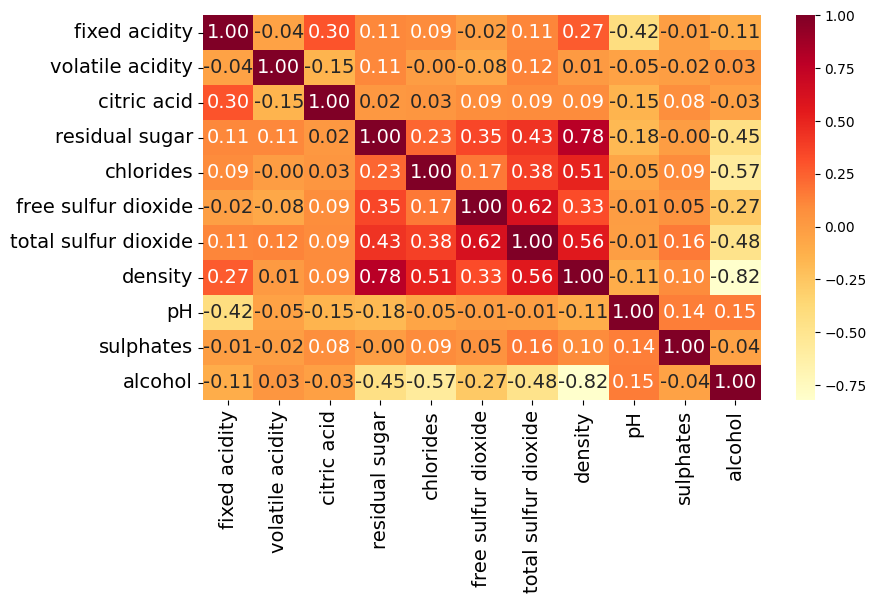

In [22]:
# Spearman correlation for white wine
white_spear = white.drop(columns='quality').corr(method='spearman')

plt.figure(figsize=(9, 5))
sns.heatmap(white_spear, annot=True, cmap='YlOrRd', fmt='.2f', annot_kws={'fontsize': 14})
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

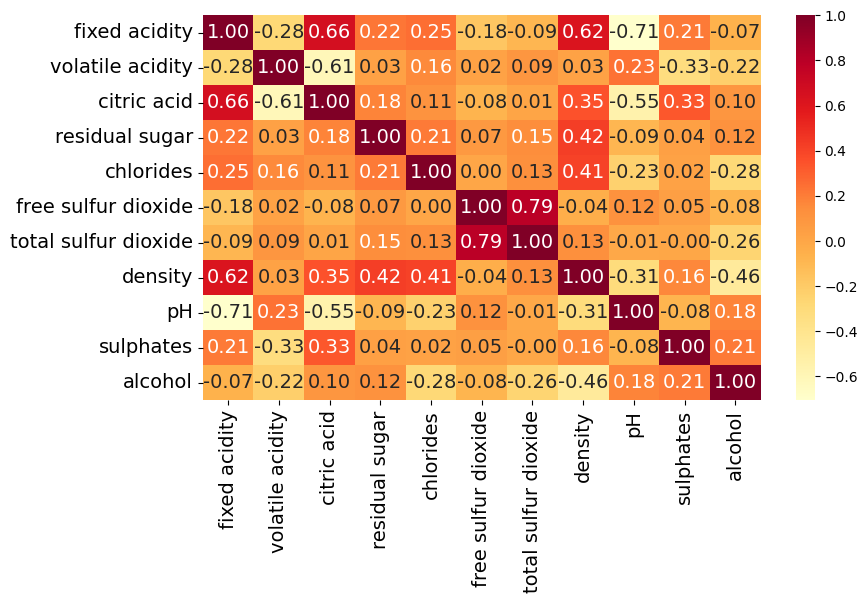

In [23]:
# Spearman correlation for red wine
red_spear = red.drop(columns='quality').corr(method='spearman')

plt.figure(figsize=(9, 5))
sns.heatmap(red_spear, annot=True, cmap='YlOrRd', fmt='.2f', annot_kws={'fontsize': 14})
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

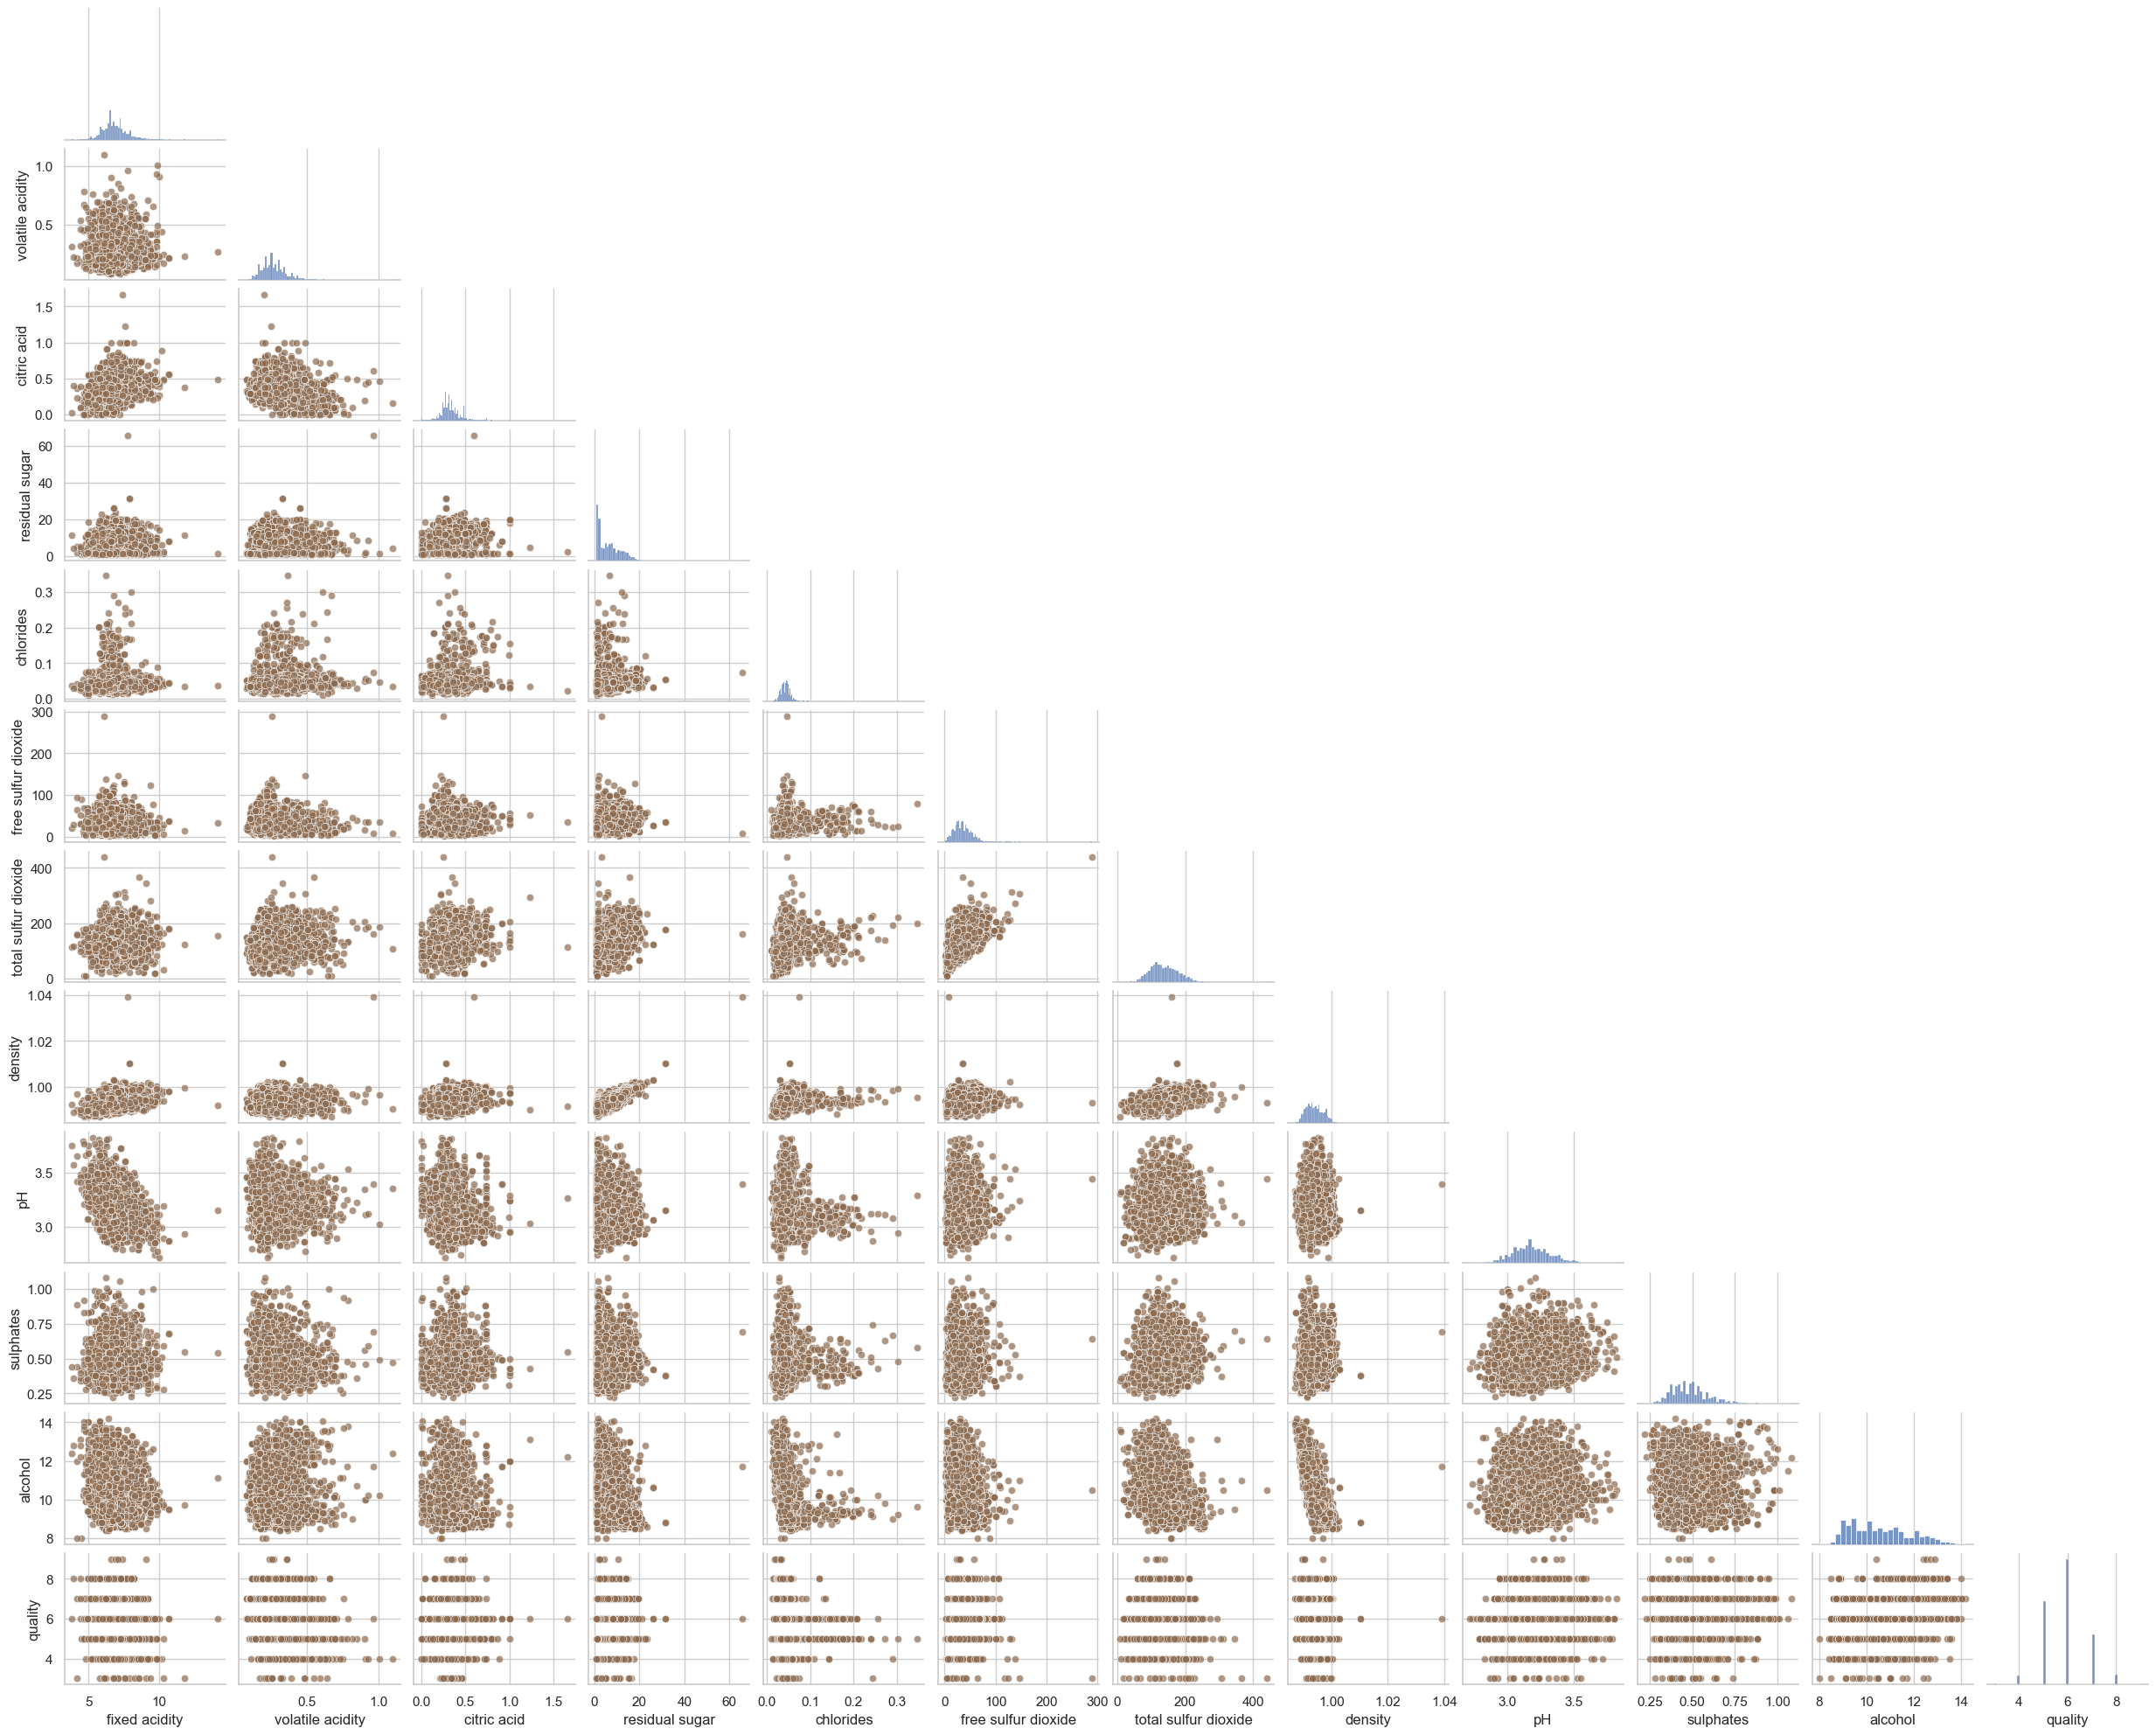

In [20]:
# Pairplots to visualize pairwise relationships
sns.set(style="whitegrid")  

g = sns.pairplot(white, 
                 plot_kws={'alpha': 0.7, 'color': '#8B6A4F'},  
                 height=2.5,              
                 corner=True)             
g.fig.set_figwidth(25) 
g.fig.set_figheight(20) 
plt.show()

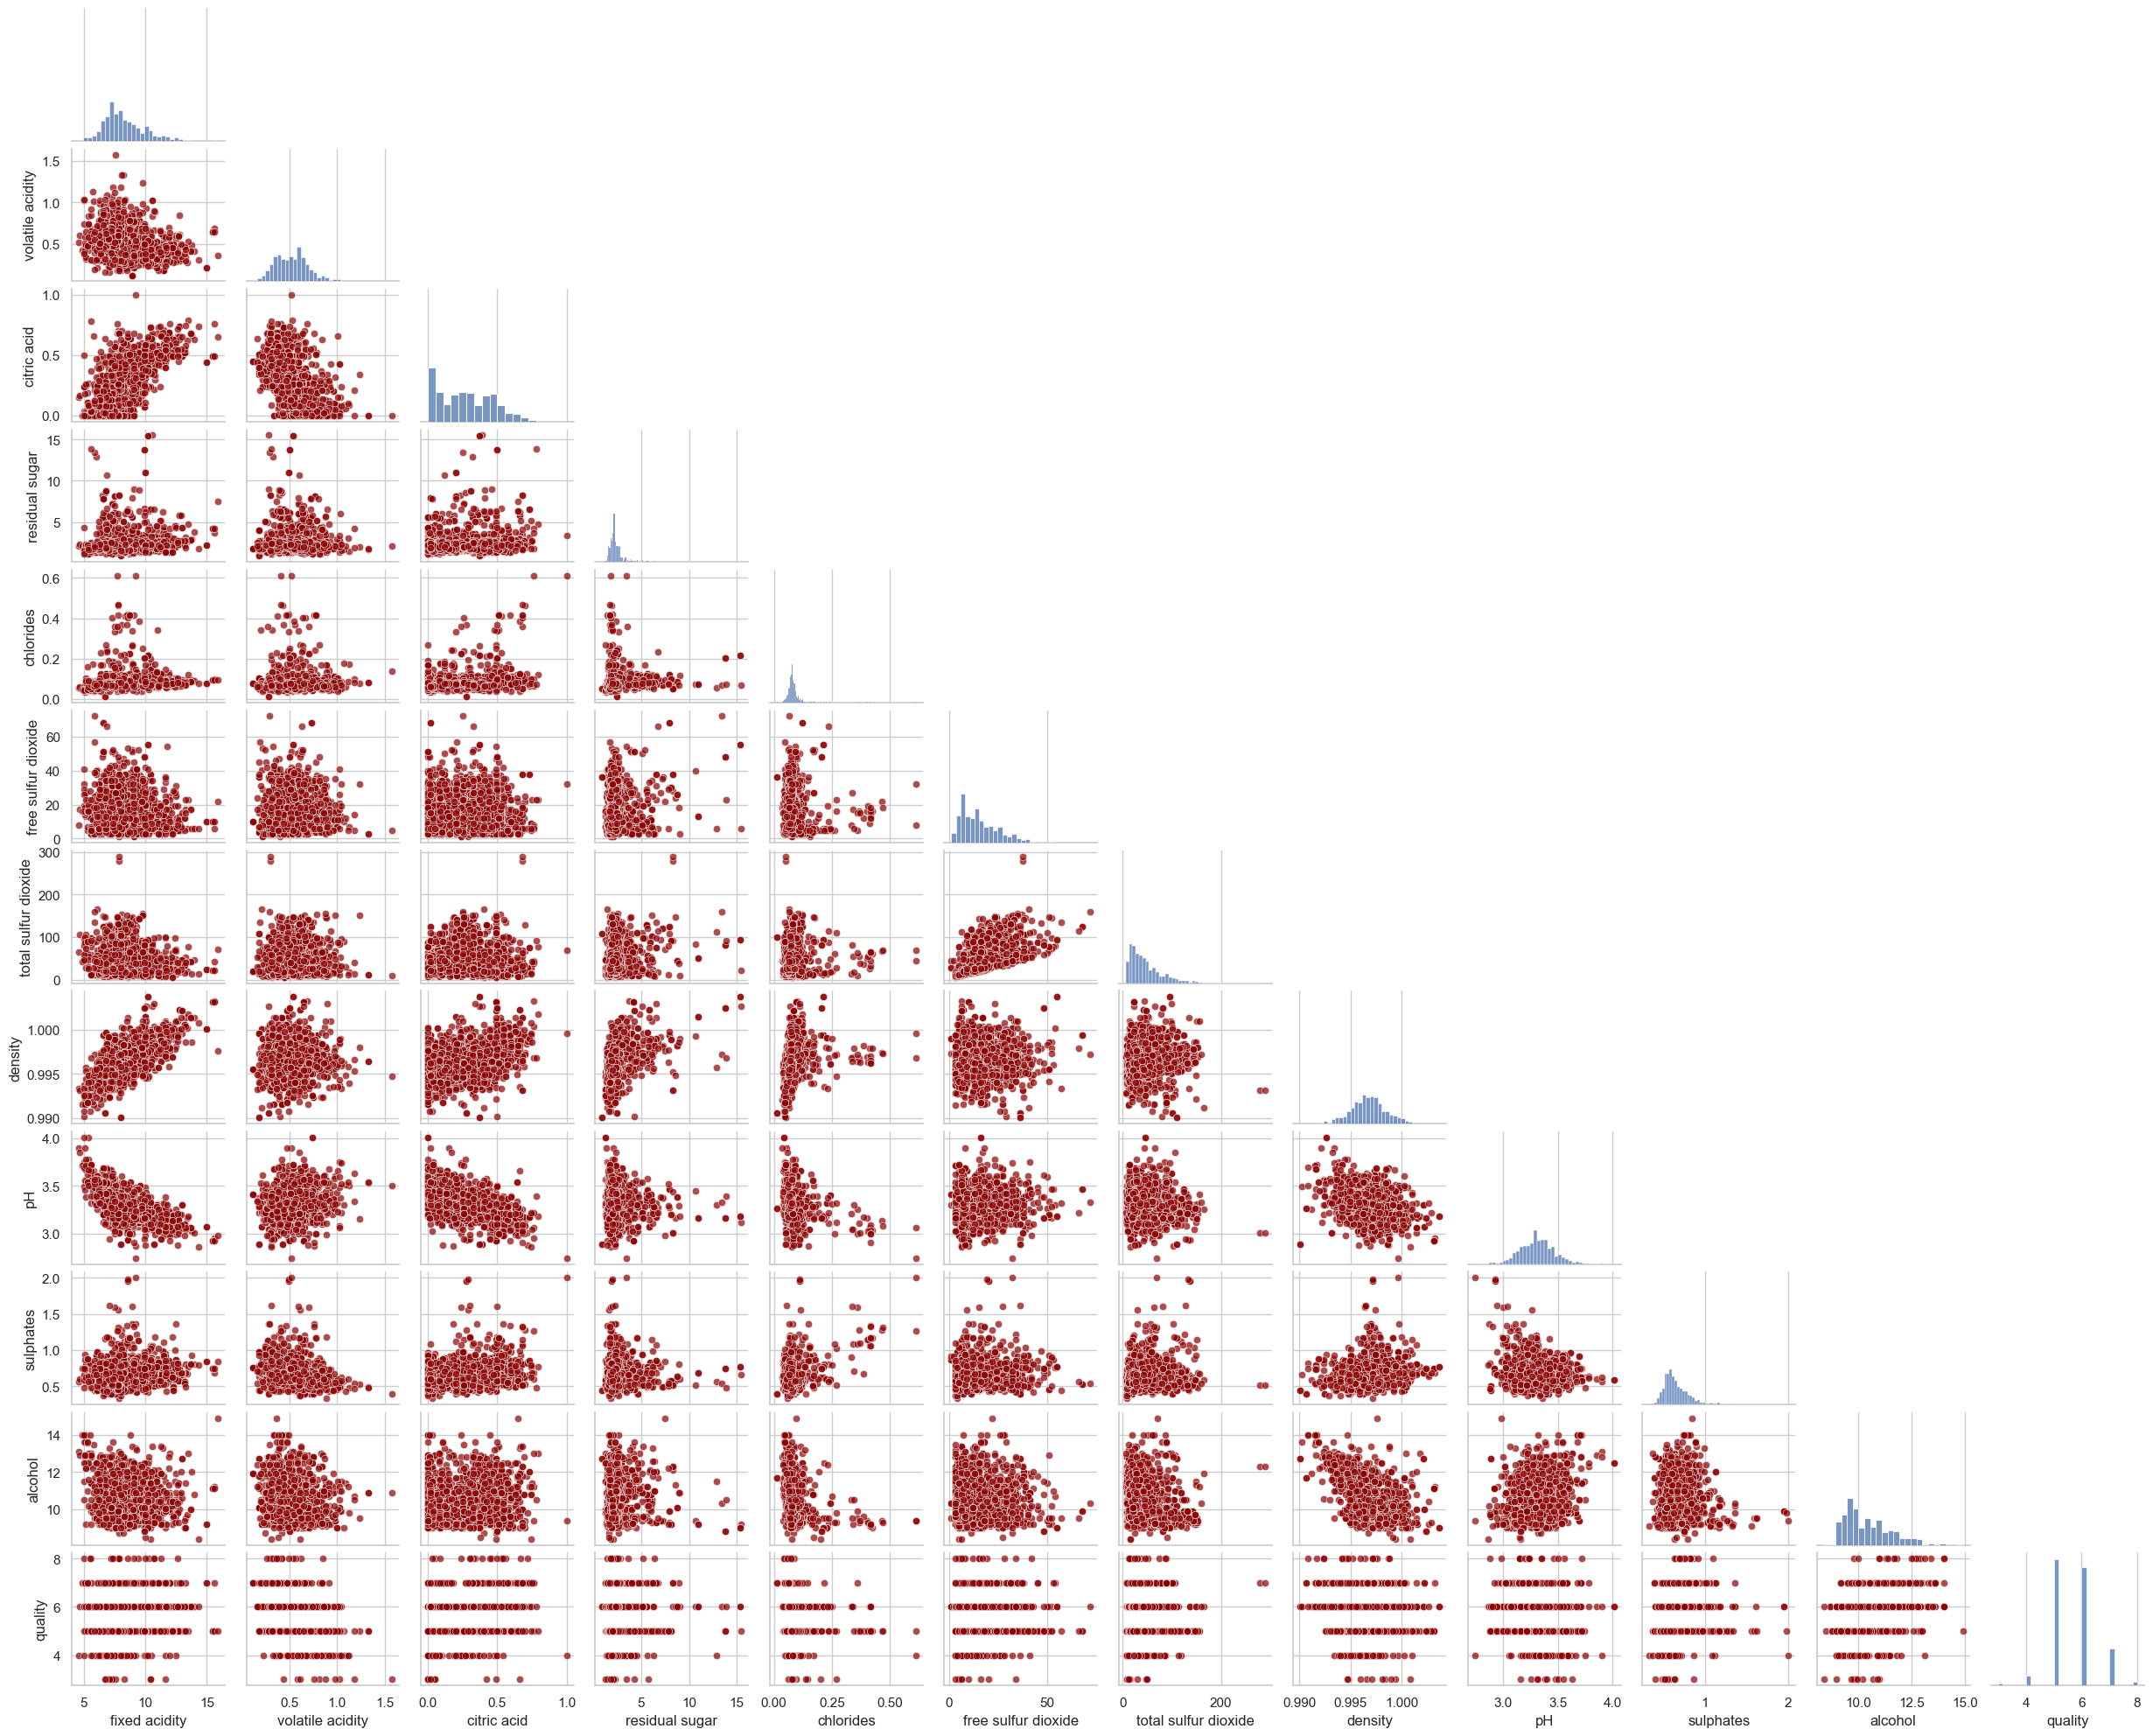

In [21]:
sns.set(style="whitegrid")  

g = sns.pairplot(red, 
                 plot_kws={'alpha': 0.7, 'color': '#8B0000'},  
                 height=2.5,              
                 corner=True)             
g.fig.set_figwidth(25) 
g.fig.set_figheight(20) 
plt.show()

<div style="text-align:center">
<b>KDE for White</b>
</div>

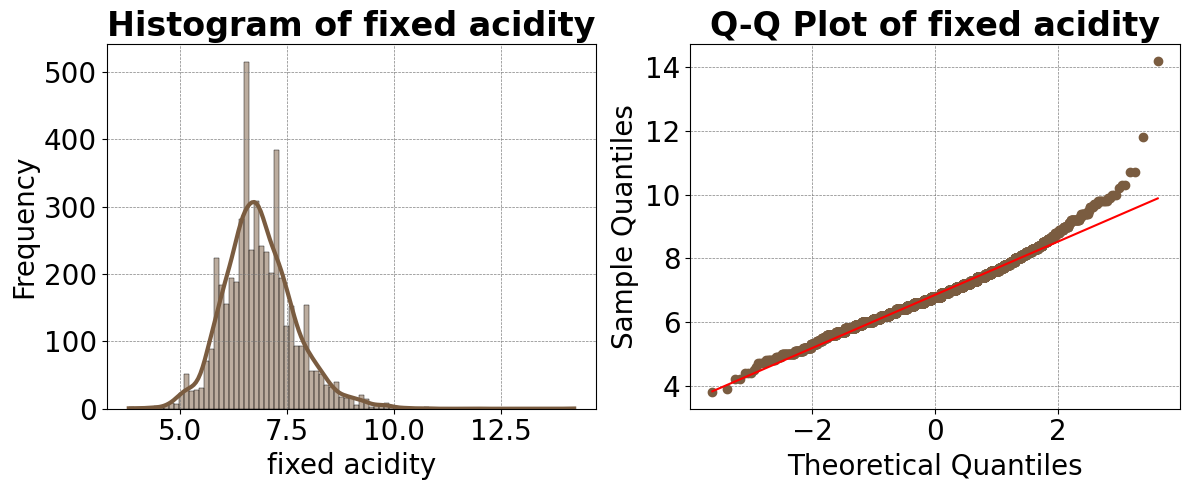

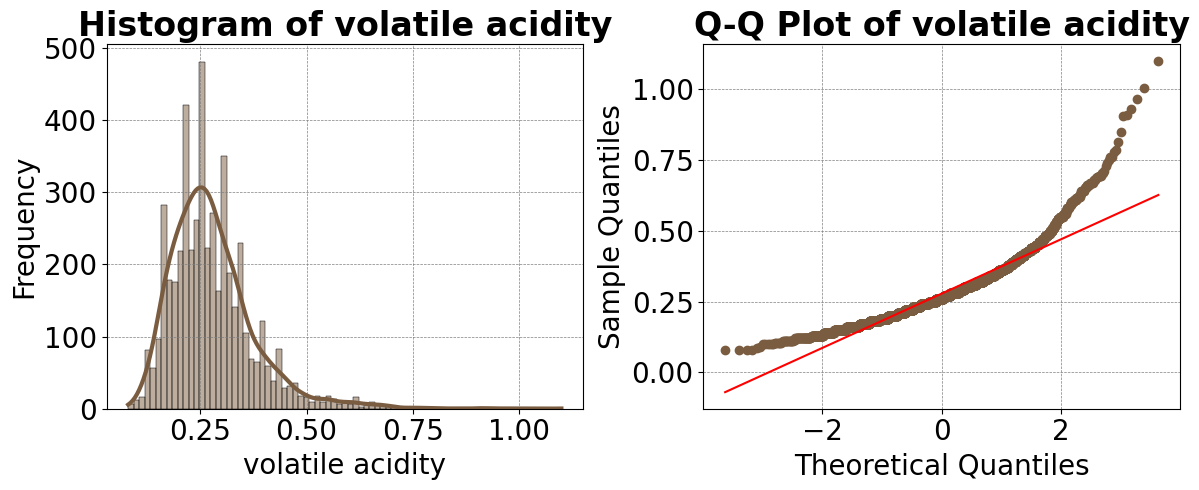

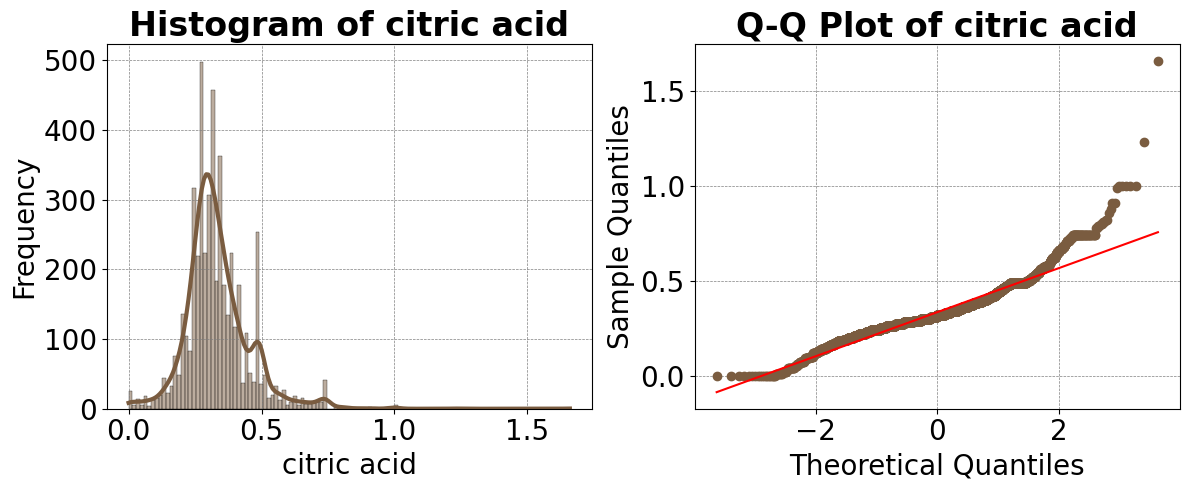

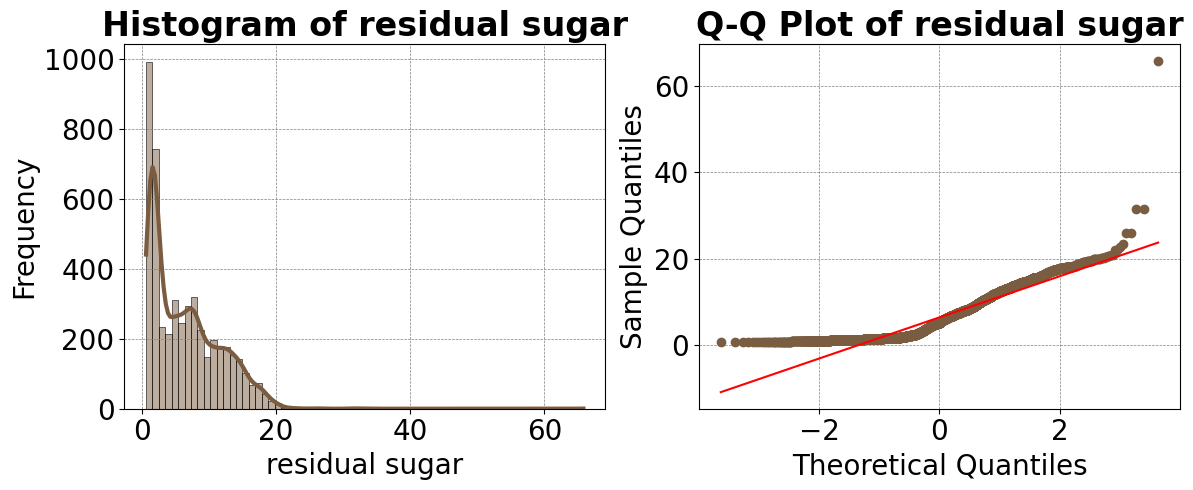

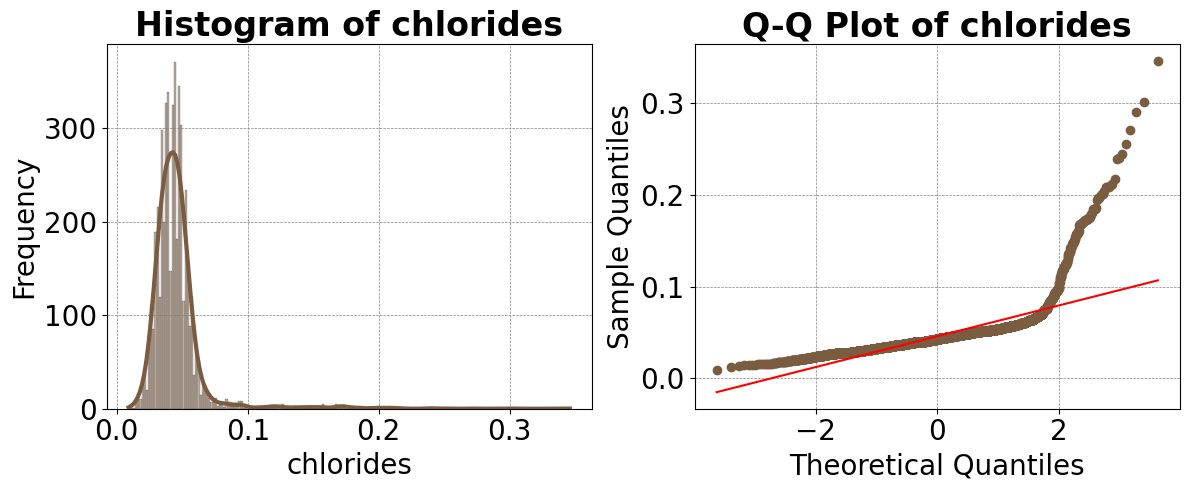

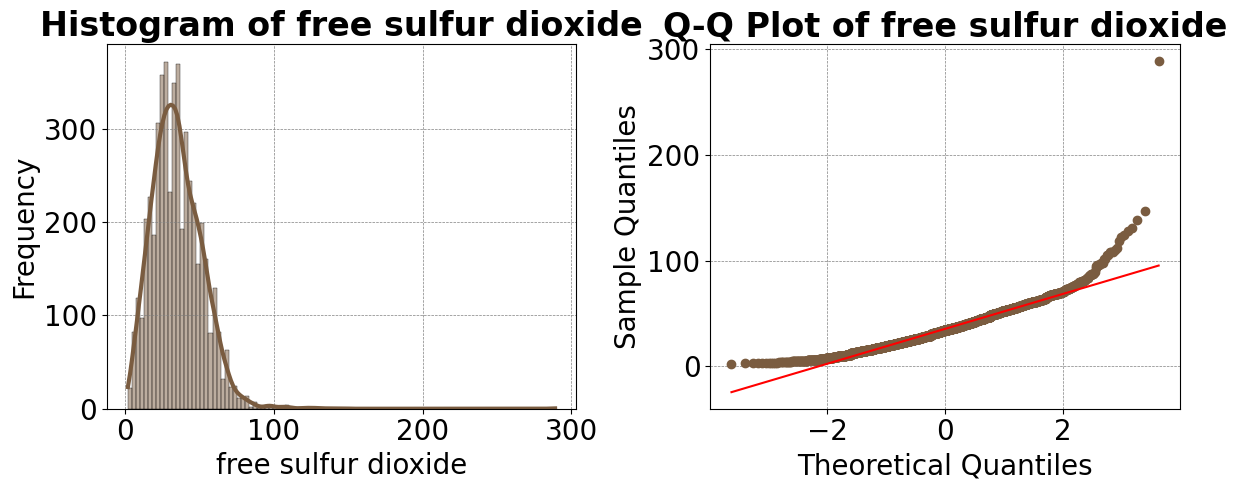

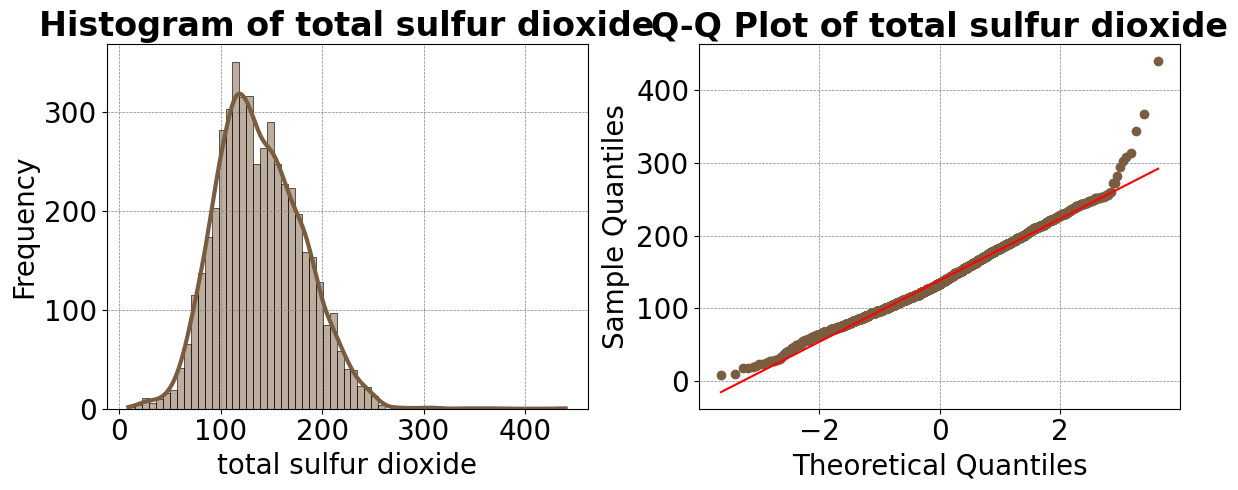

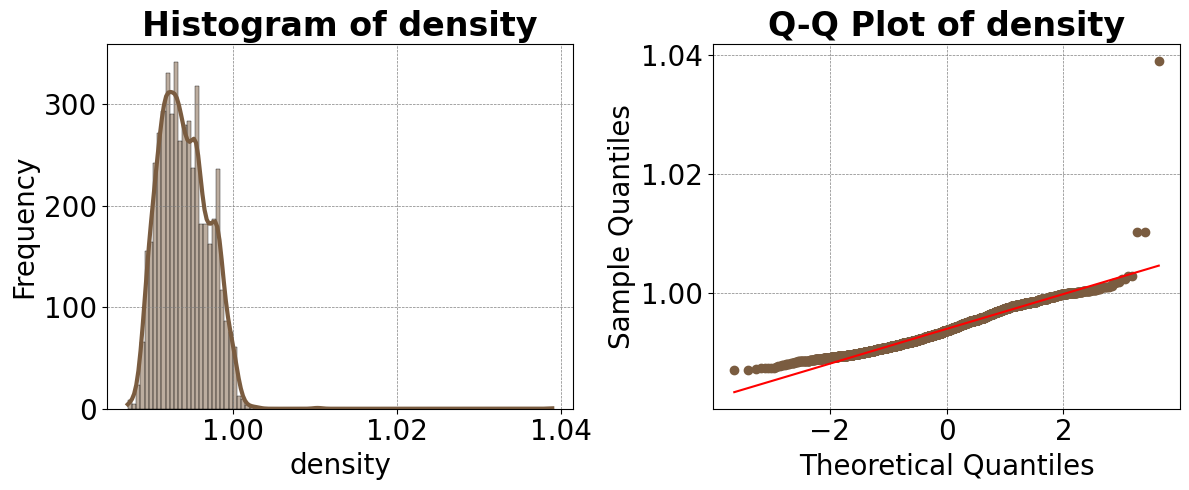

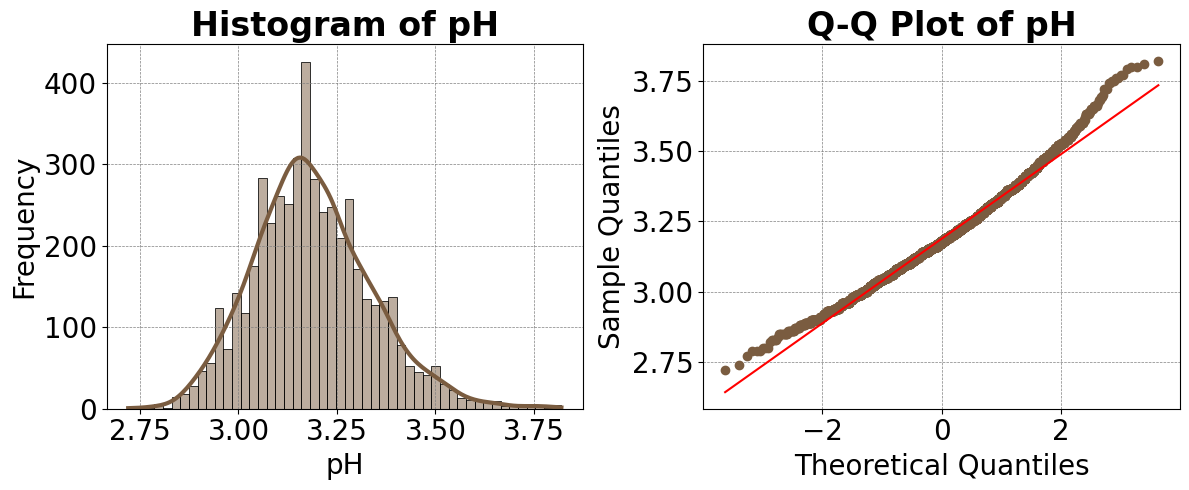

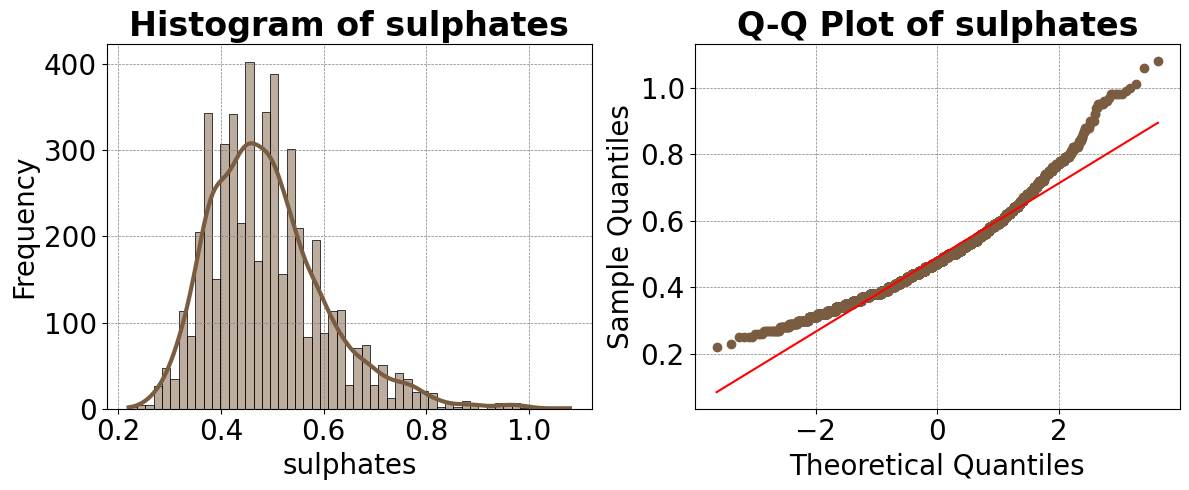

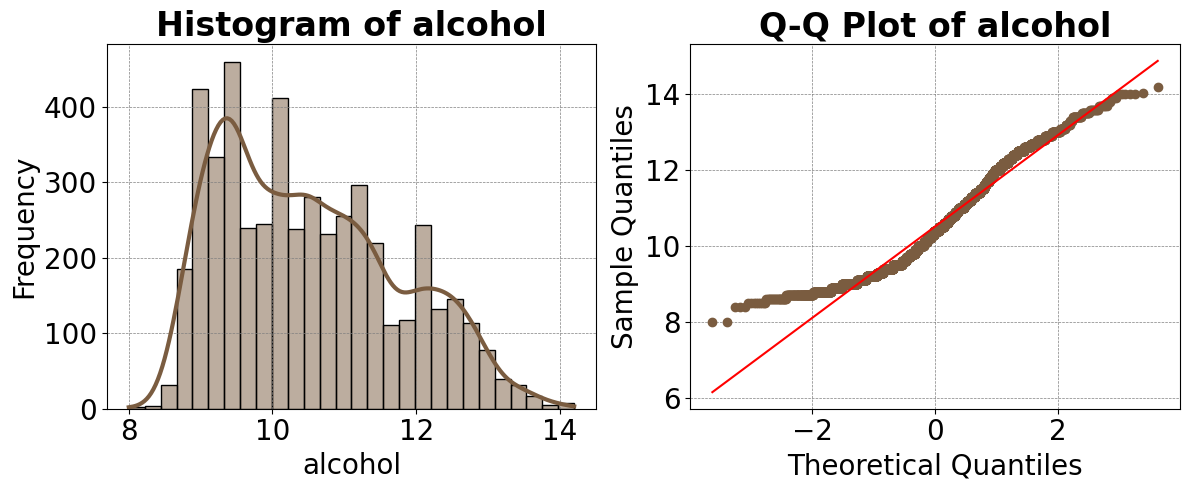

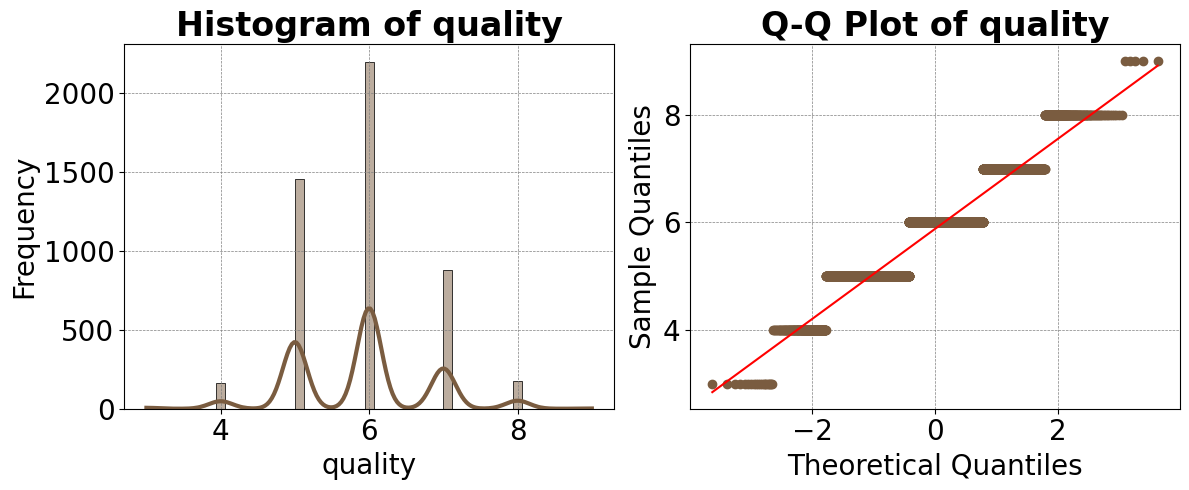

In [22]:
for column in white.columns:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(white[column], kde=True, color='#7A5C40', line_kws={'linewidth': 3, 'color': '#7A5C40'})  
    plt.title(f'Histogram of {column}', fontsize=24, fontweight='bold')
    plt.xlabel(column, fontsize=20)
    plt.ylabel('Frequency', fontsize=20)  
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
    
    plt.subplot(1, 2, 2)
    stats.probplot(white[column], plot=plt)
    plt.title(f'Q-Q Plot of {column}', fontsize=24, fontweight='bold')
    plt.xlabel('Theoretical Quantiles', fontsize=20)
    plt.ylabel('Sample Quantiles', fontsize=20) 
    plt.tick_params(axis='both', which='major', labelsize=20)   
    plt.gca().get_lines()[0].set_color('#7A5C40')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray') 

    plt.tight_layout()
    plt.show()

<div style="text-align:center">
<b>KDE for Red</b>
</div>

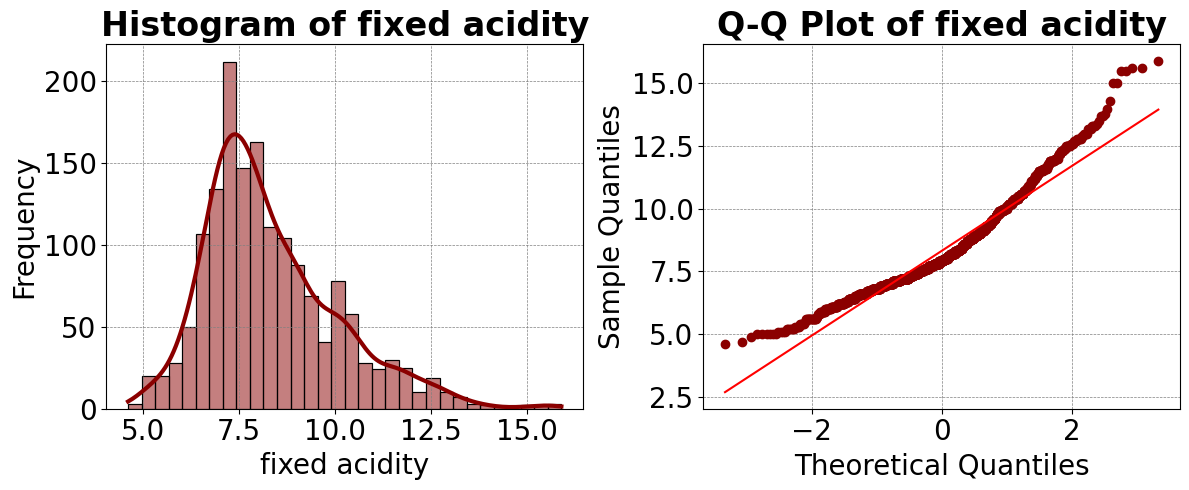

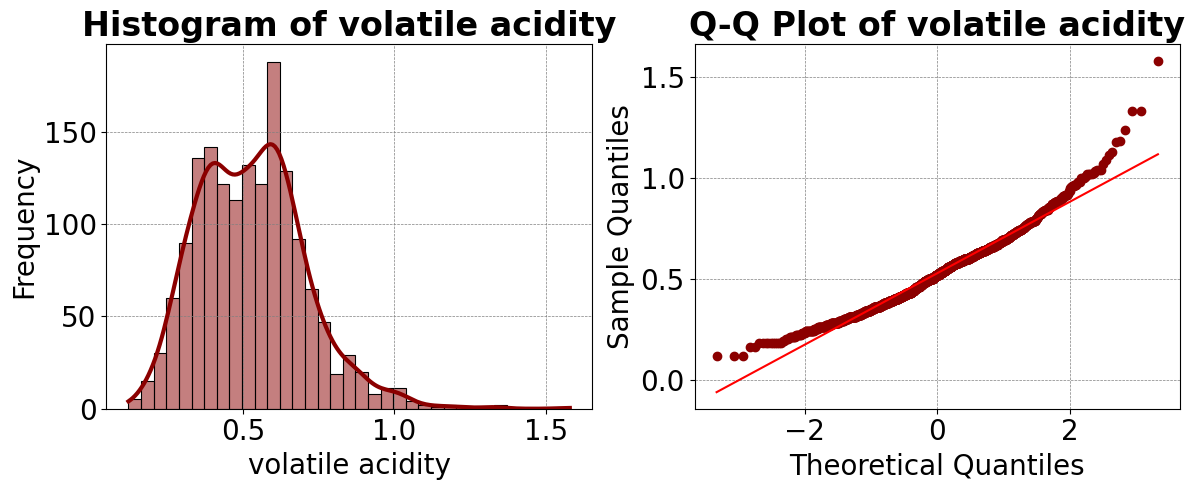

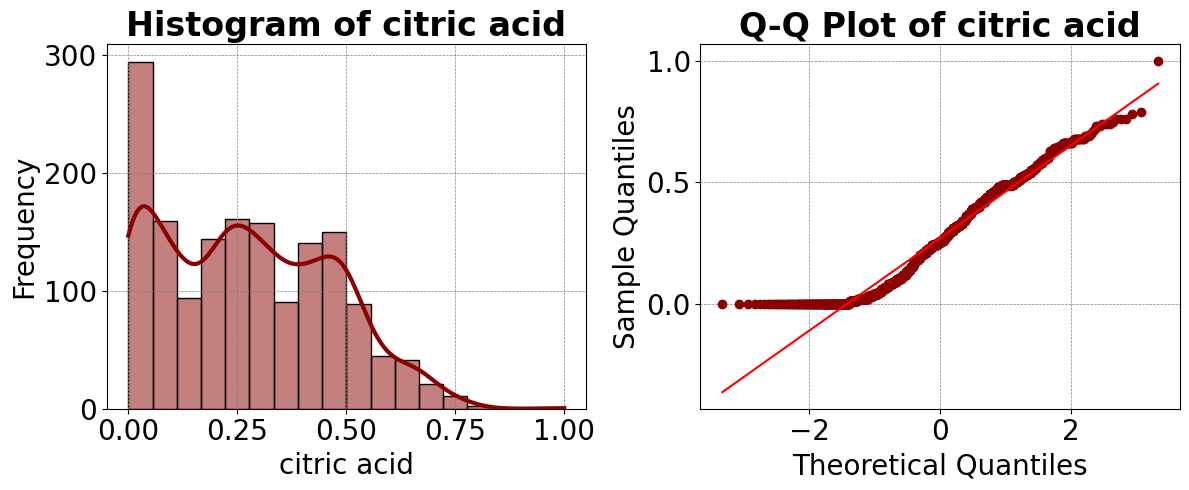

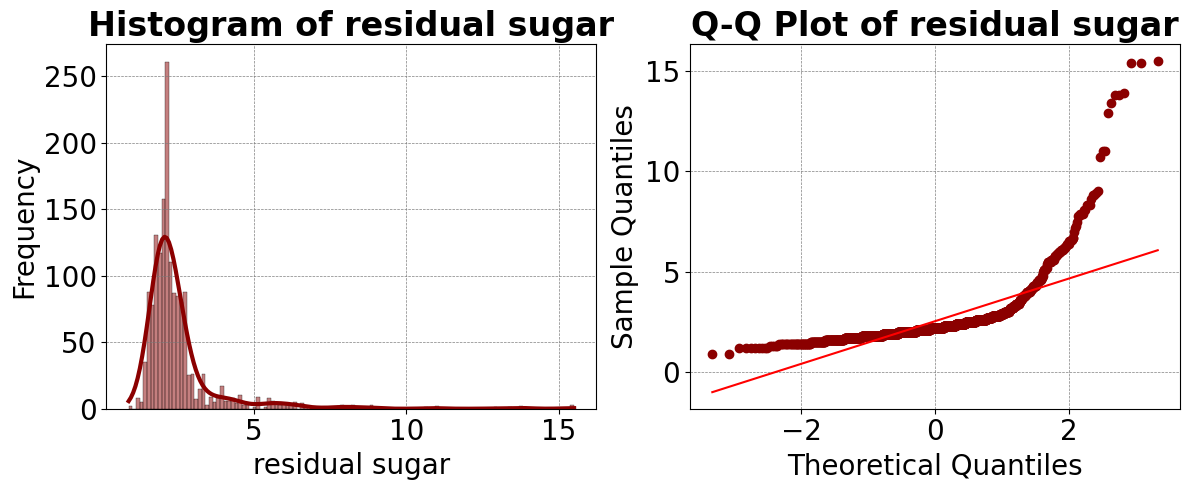

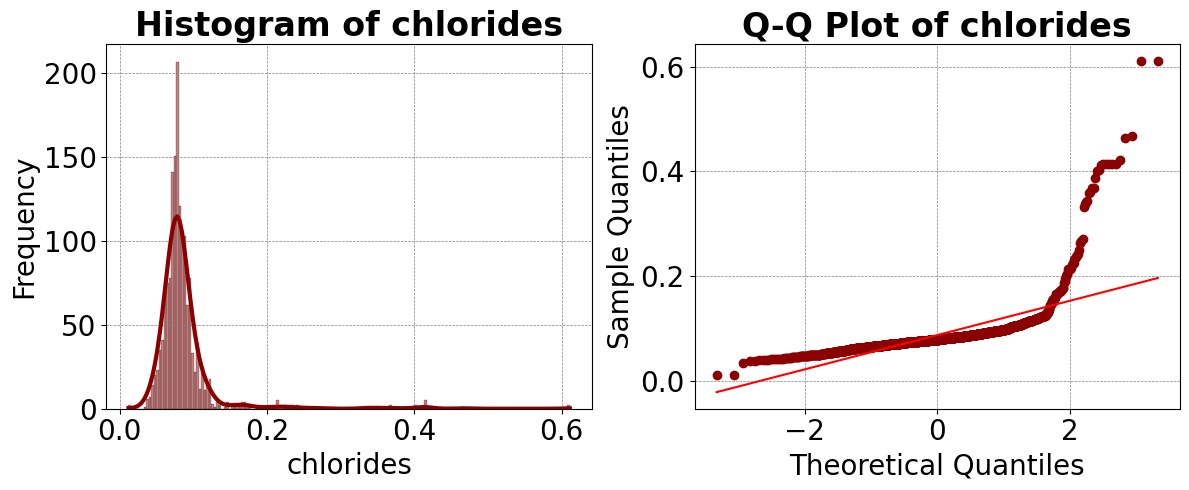

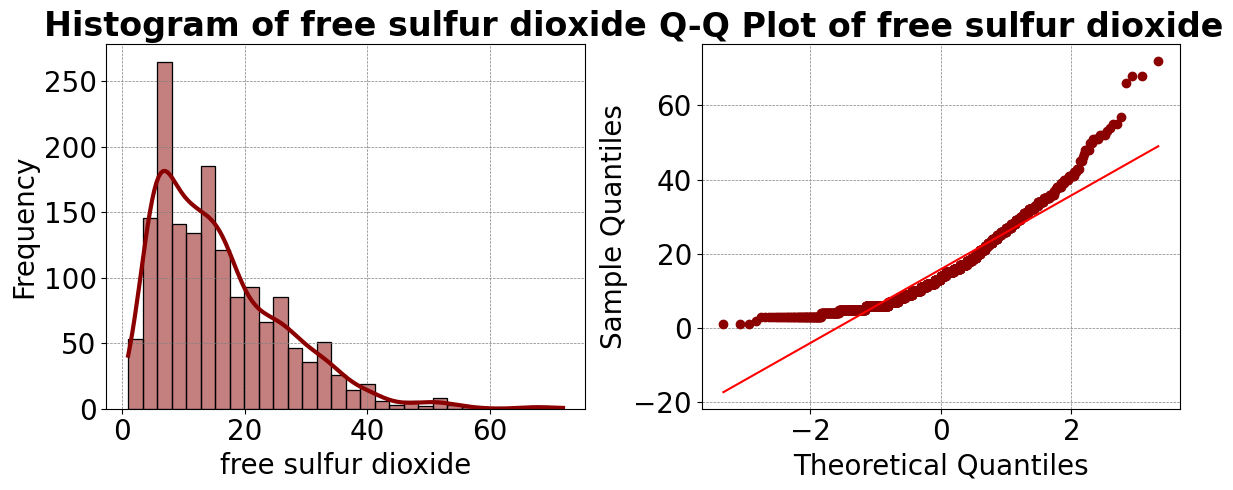

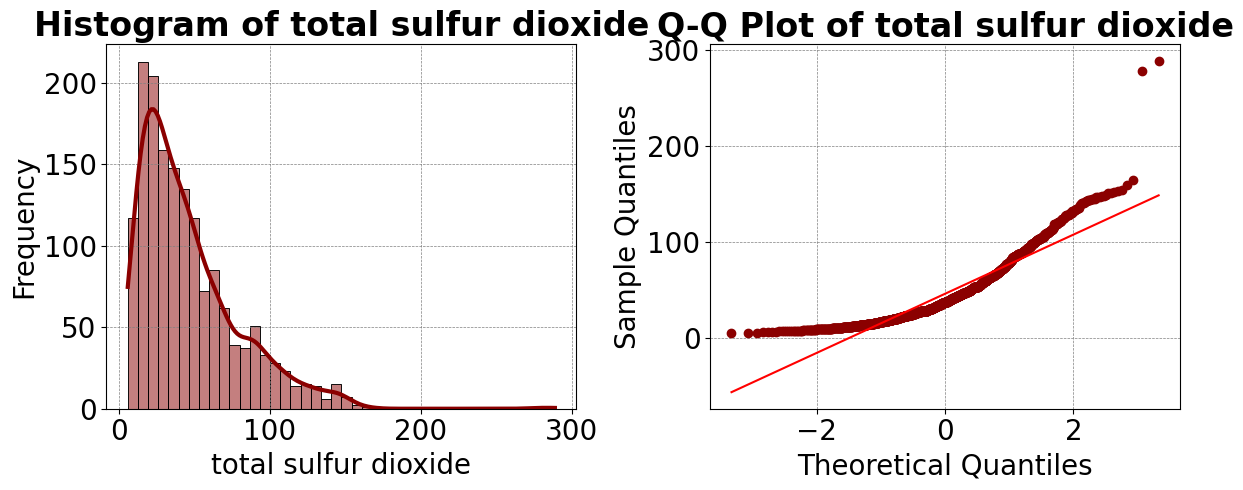

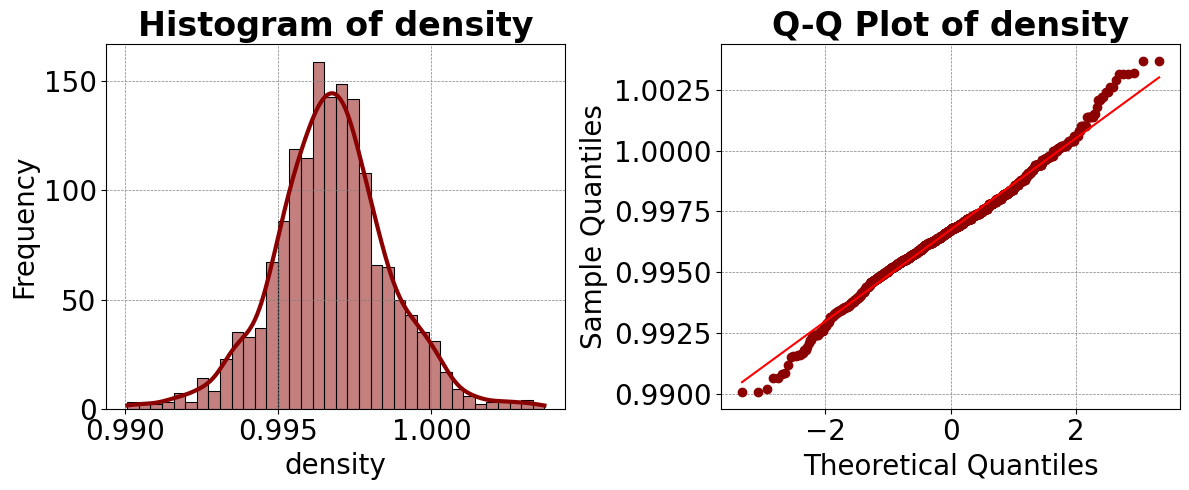

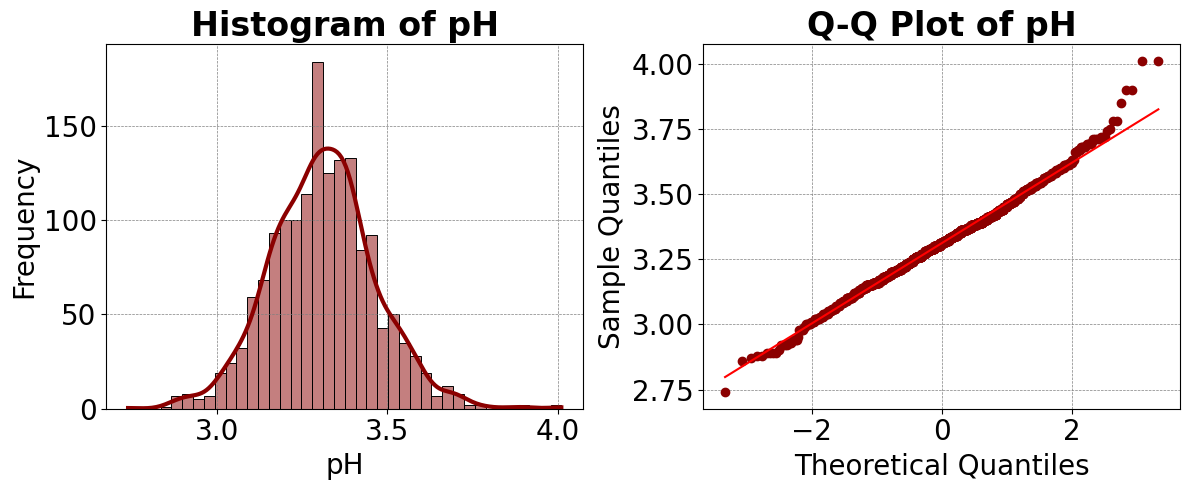

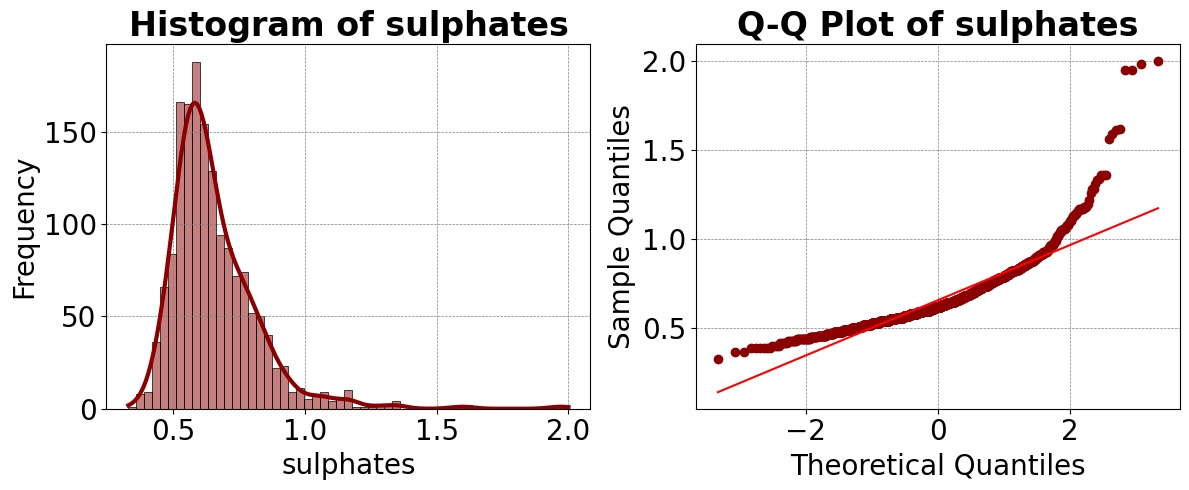

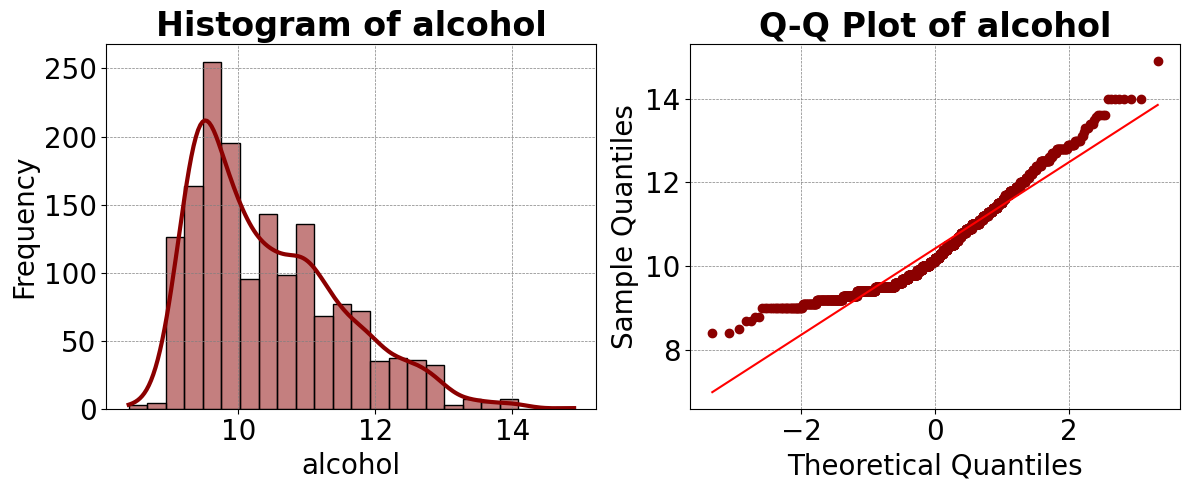

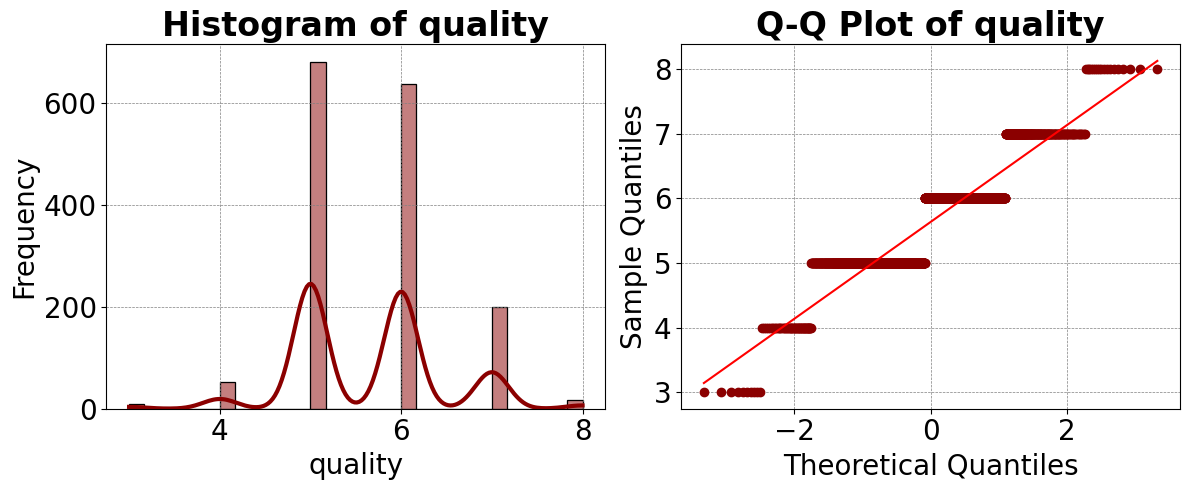

In [21]:
for column in red.columns:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(red[column], kde=True, color='#8B0000', line_kws={'linewidth': 3, 'color': '#8B0000'}) 
    plt.title(f'Histogram of {column}', fontsize=24, fontweight='bold')
    plt.xlabel(column, fontsize=20)
    plt.ylabel('Frequency', fontsize=20)  
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
    
    plt.subplot(1, 2, 2)
    stats.probplot(red[column], plot=plt)
    plt.title(f'Q-Q Plot of {column}', fontsize=24, fontweight='bold')
    plt.xlabel('Theoretical Quantiles', fontsize=20)
    plt.ylabel('Sample Quantiles', fontsize=20) 
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')   
    
    plt.gca().get_lines()[0].set_color('#8B0000')  

    plt.tight_layout()
    plt.show()